Tutorial
================




Quickstart
-------------

Here is how to fit a simple likelihood function:

In [1]:
paramnames = ['Hinz', 'Kunz']

def loglike(z):
    return -0.5 * (((z - 0.5) / 0.01)**2).sum()

def transform(x):
    return 10. * x - 5.

from snowline import ReactiveImportanceSampler

sampler = ReactiveImportanceSampler(paramnames, loglike, transform)

sampler.run()

[snowline]     from: [0.56438597 0.54802914]


[snowline]     error: [0.04 0.04]


Maximum likelihood: L = -0.0 at:
    Hinz                0.5000 +- 0.0100
    Kunz                0.5000 +- 0.0100
[snowline]     using correlated errors ...


max_improvement_loops: 4
[snowline] Initiating gaussian importance sampler


[snowline]     sampling 400 ...


it: 0
[snowline]     sampling efficiency: 71.360%


[snowline] Optimizing proposal (from scratch) ...


[snowline]     running variational Bayes ...


[snowline]     reduced from 10 to 1 components


[snowline] Importance sampling 400 ...


[snowline] Likelihood function evaluations: 1254


[snowline] Status: Have 682 total effective samples, done.



logZ = -11.972 +- 0.015

    Hinz                0.4996 +- 0.0098
    Kunz                0.5000 +- 0.0096


{'z': 6.3192152389258316e-06,
 'zerr': 9.2650371974396e-08,
 'logz': -11.971915528571412,
 'logzerr': 0.01455524613608361,
 'ess': 0.8534191598919177,
 'paramnames': ['Hinz', 'Kunz'],
 'ncall': 1254,
 'posterior': {'mean': [0.49960242433597346, 0.4999538165347757],
  'stdev': [0.00978572088465908, 0.0096072223919444],
  'median': [0.4997359970696653, 0.4995491976153108],
  'errlo': [0.48946614948246037, 0.490660840526286],
  'errup': [0.5096110778415932, 0.5093200985722302]},
 'samples': array([[0.49418462, 0.51163916],
        [0.5113482 , 0.50912744],
        [0.47702673, 0.49378531],
        ...,
        [0.48560437, 0.51489688],
        [0.50903567, 0.49961164],
        [0.51952288, 0.50047799]])}

This gave us error estimates and even logZ!

In [2]:
print("Loglikelihood was called %d times." % sampler.results['ncall'])

Loglikelihood was called 1254 times.


Visualisation
--------------------

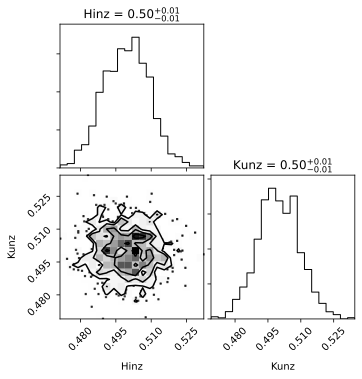

In [3]:
import corner
corner.corner(sampler.results['samples'], labels=paramnames, show_titles=True);

Advanced usage
-----------------------

Lets try a function that cannot be described by a simple gaussian.

In [4]:

paramnames = ['Hinz', 'Kunz'] #, 'Fuchs', 'Gans', 'Hofer']

def loglike_rosen(theta):
    a = theta[:-1]
    b = theta[1:]
    return -2 * (100 * (b - a**2)**2 + (1 - a)**2).sum()

def transform_rosen(u):
    return u * 20 - 10

sampler = ReactiveImportanceSampler(paramnames, loglike_rosen, transform=transform_rosen)
sampler.run(min_ess=1000, max_ncalls=1000000)


[snowline]     from: [0.44027712 0.5883197 ]


[snowline]     error: [0.04 0.04]


Maximum likelihood: L = -0.0 at:
    Hinz                1.00 +- 0.51
    Kunz                1.0 +- 1.0
[snowline]     using correlated errors ...


max_improvement_loops: 4
[snowline] Initiating gaussian importance sampler


[snowline]     sampling 400 ...


it: 0
[snowline]     sampling efficiency: 19.511%


[snowline] Optimizing proposal (from scratch) ...


[snowline]     running variational Bayes ...


[snowline]     reduced from 10 to 5 components


[snowline] Importance sampling 400 ...


[snowline] Likelihood function evaluations: 1430


[snowline] Status: Have 74 total effective samples, sampling 560 next.


it: 1
[snowline]     sampling efficiency: 9.372%


[snowline] Optimizing proposal (from previous) ...


[snowline]     running variational Bayes ...


[snowline]     reduced from 10 to 4 components


[snowline] Importance sampling 560 ...


[snowline] Likelihood function evaluations: 1990


[snowline] Status: Have 305 total effective samples, sampling 784 next.


it: 2
[snowline]     sampling efficiency: 22.478%


[snowline] Optimizing proposal (from previous) ...


[snowline]     running variational Bayes ...


[snowline]     reduced from 10 to 4 components


[snowline] Importance sampling 784 ...


[snowline] Likelihood function evaluations: 2774


[snowline] Status: Have 65 total effective samples, sampling 1097 next.


it: 3
[snowline]     sampling efficiency: 3.042%


[snowline] Optimizing proposal (from scratch) ...


[snowline]     running variational Bayes ...


[snowline]     reduced from 11 to 7 components


[snowline] Importance sampling 1097 ...


[snowline] Likelihood function evaluations: 3871


[snowline] Status: Have 1099 total effective samples, done.



logZ = -8.269 +- 0.024

    Hinz                1.01 +- 0.26
    Kunz                1.09 +- 0.54


{'z': 0.0002564108170180032,
 'zerr': 6.285772553585765e-06,
 'logz': -8.268729645749916,
 'logzerr': 0.024218802175846932,
 'ess': 0.3393158972446249,
 'paramnames': ['Hinz', 'Kunz'],
 'ncall': 3871,
 'posterior': {'mean': [1.0130955443766159, 1.090684851131878],
  'stdev': [0.2630254774172083, 0.5376617898254736],
  'median': [1.0134139412964611, 1.0314056892276984],
  'errlo': [0.7103075482966738, 0.49728602821583223],
  'errup': [1.310877924439433, 1.7179612336998176]},
 'samples': array([[0.64100247, 0.3701702 ],
        [1.08180292, 1.2586207 ],
        [1.43197993, 1.9806441 ],
        ...,
        [1.2163557 , 1.56727528],
        [1.49469281, 2.20910027],
        [0.82113184, 0.69647291]])}

This already took quite a bit more effort.

In [5]:
print("Loglikelihood was called %d times." % sampler.results['ncall'])

Loglikelihood was called 3871 times.


Lets see how well it did:

In [6]:
from getdist import MCSamples, plots
import matplotlib.pyplot as plt

samples_g = MCSamples(samples=sampler.results['samples'],
                       names=sampler.results['paramnames'],
                       label='Gaussian',
                       settings=dict(smooth_scale_2D=3), sampler='nested')

mcsamples = [samples_g]


Removed no burn in


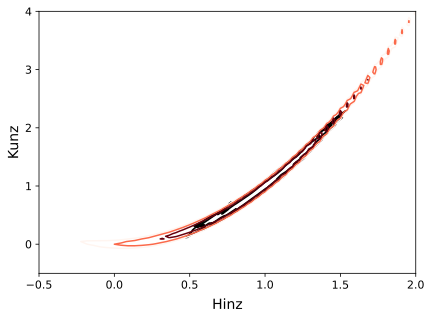

In [7]:
import numpy as np
x = np.linspace(-0.5, 4, 100)
a, b = np.meshgrid(x, x)
z = -2 * (100 * (b - a**2)**2 + (1 - a)**2)

g = plots.get_single_plotter()
g.plot_2d(mcsamples, paramnames)
plt.contour(a, b, z, [-3, -2, -1], cmap='Reds')
plt.xlim(-0.5, 2)
plt.ylim(-0.5, 4);

As you can see, the importance sampler was not able to perfectly follow the rosenbrock curvature. But it is a good start to roughly understand the uncertainties!

Removed no burn in


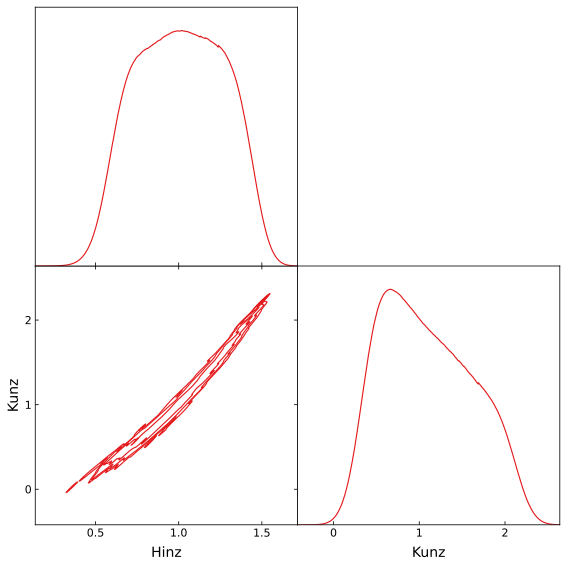

In [8]:
from getdist import MCSamples, plots
import matplotlib.pyplot as plt

samples_g = MCSamples(samples=sampler.results['samples'],
                       names=sampler.results['paramnames'],
                       label='Gaussian',
                       settings=dict(smooth_scale_2D=3), sampler='nested')

mcsamples = [samples_g]

g = plots.get_subplot_plotter(width_inch=8)
g.settings.num_plot_contours = 3
g.triangle_plot(mcsamples, filled=False, contour_colors=plt.cm.Set1.colors)

#corner.corner(sampler.results['samples'], labels=sampler.results['paramnames'], show_titles=True);